# WSDM - KKBox's Churn Prediction Challenge
### Can you predict when subscribers will churn?

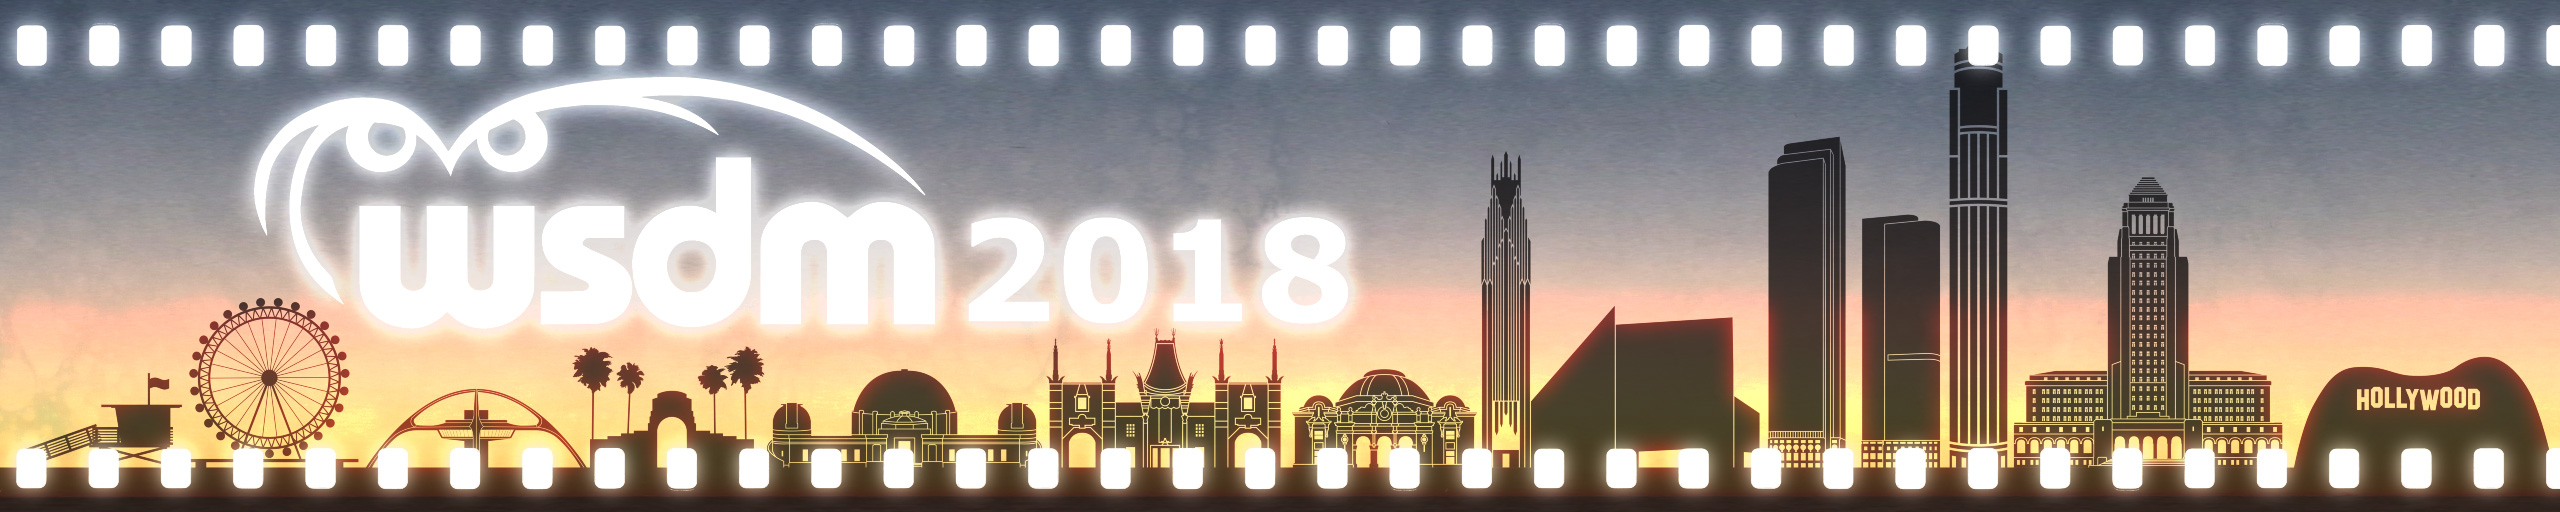

In [270]:
from PIL import Image as pil
pil.open('WSDM.jpg')

### Churn : 어떤 이용자가 사용하는 음악 스트리밍 서비스가 만료된 이후 1달 동안 연장을 하지 않은 경우를 의미
- File Update : 2017/11/06에 새로운 dataset을 제공함 
- 즉, train set을 통해 10월 6일 이전에 서비스가 만료되는 이용자들의 churn 여부를 알 수 있다.

### About dataset
- train.csv : 이용자의 고유번호인 msno와, churn 했는지 안했는지를 알 수 있는 데이터
- sample_submission.csv : 이용자의 고유번호인 msno와, churn 했는지 안했는지를 추측해야 하는 데이터
- members.csv : 이용자들의 개인신상정보. 가입일, 생일, 나이 등
- user_log.csv : 이용자들이 음악을 청취하는 스타일이 담긴 데이터
- transactions.csv : 이용자들의 결제/취소 기록 관련 데이터

### Before preprocessing
- 아웃라이어보다는 결측값, 이상값들이 많았다.
- 특히 이용자가 직접 입력해야하는 members 데이터에 다수 있었다. 

# EDA

In [2]:
train_f = pd.read_csv("train_final_2.csv")

In [3]:
len(train_f)

933578

In [4]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933578 entries, 0 to 933577
Data columns (total 27 columns):
msno                      933578 non-null object
is_churn                  933578 non-null int64
payment_method_id         933578 non-null float64
payment_plan_days         933578 non-null float64
plan_list_price           933578 non-null float64
actual_amount_paid        933578 non-null float64
is_auto_renew             933578 non-null float64
transaction_date          933578 non-null float64
membership_expire_date    933578 non-null float64
is_cancel                 933578 non-null float64
num_25                    933578 non-null float64
num_50                    933578 non-null float64
num_75                    933578 non-null float64
num_985                   933578 non-null float64
num_100                   933578 non-null float64
num_unq                   933578 non-null float64
total_secs                933578 non-null float64
city                      933578 non-null 

> gender

In [5]:
# churn = 1 의 비율
len(train_f["is_churn"][train_f["is_churn"]==1])/len(train_f["is_churn"])

0.062014100589345506

<IPython.core.display.Javascript object>


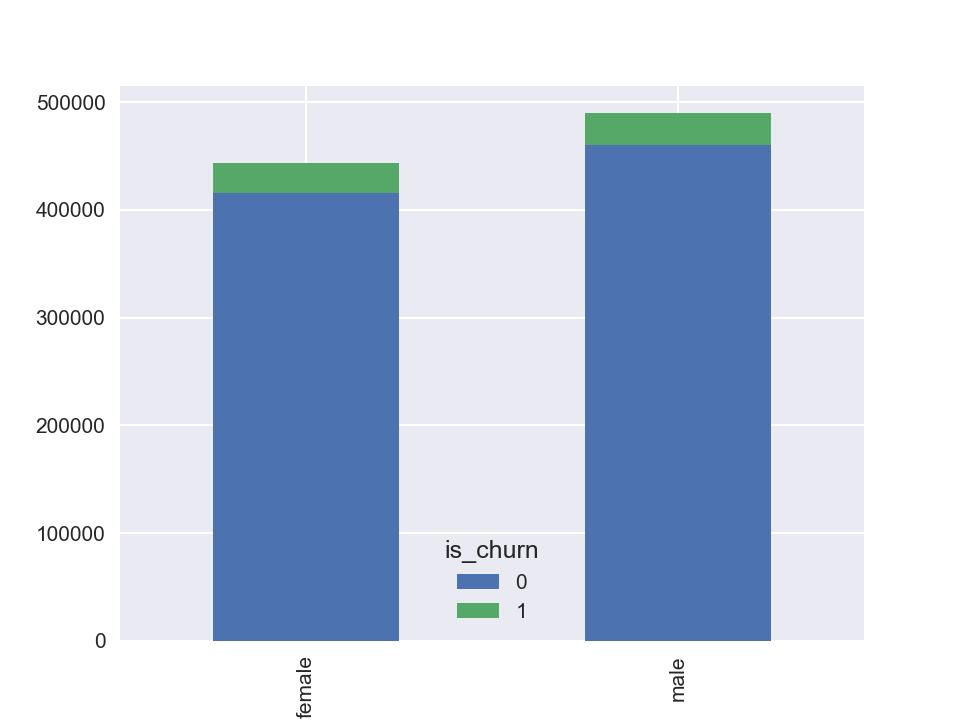

is_churn,0,1,Ratio
gender,,,
female,415706,27758,0.066773
male,459977,30137,0.065518


In [6]:
gender_crosstab=pd.crosstab(train_f['gender'],train_f['is_churn'])
gender_crosstab.plot(kind='bar', stacked=True, grid=True)
gender_crosstab["Ratio"] =  gender_crosstab[1] / gender_crosstab[0]
gender_crosstab

> Registerd_via

<IPython.core.display.Javascript object>


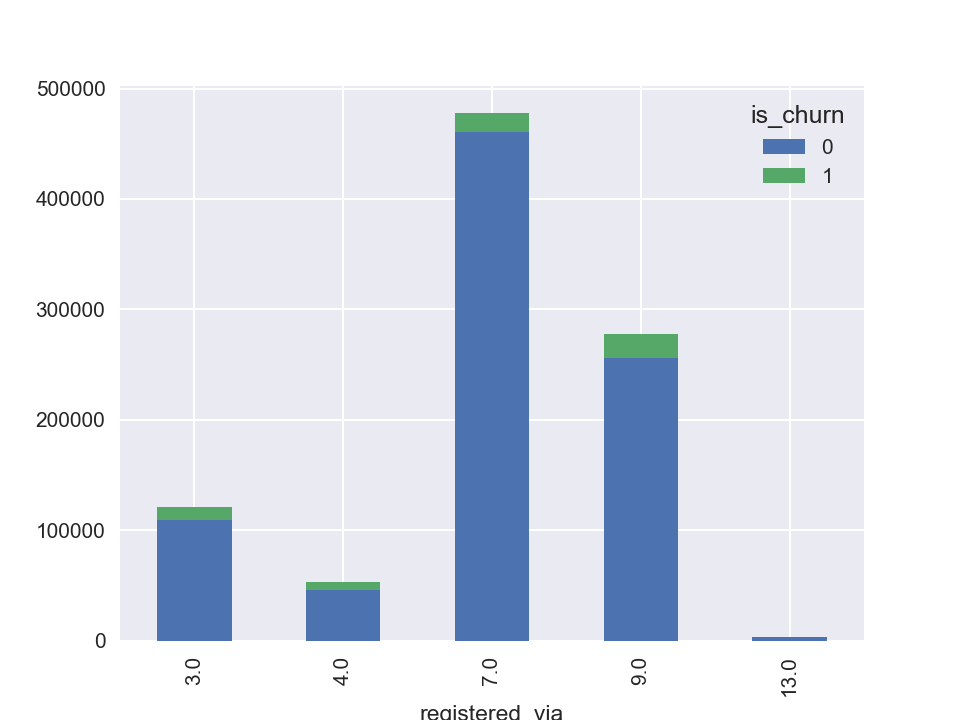

is_churn,0,1,Ratio
registered_via,,,
3.0,109052,11637,0.106711
4.0,46361,6959,0.150105
7.0,460748,17284,0.037513
9.0,256388,21739,0.084789
13.0,3134,276,0.088066


In [7]:
registered_via_crosstab=pd.crosstab(train_f['registered_via'],train_f['is_churn'])
registered_via_crosstab.plot(kind='bar', stacked=True, grid=True)
registered_via_crosstab["Ratio"] =  registered_via_crosstab[1] / registered_via_crosstab[0]
registered_via_crosstab

> city

<IPython.core.display.Javascript object>


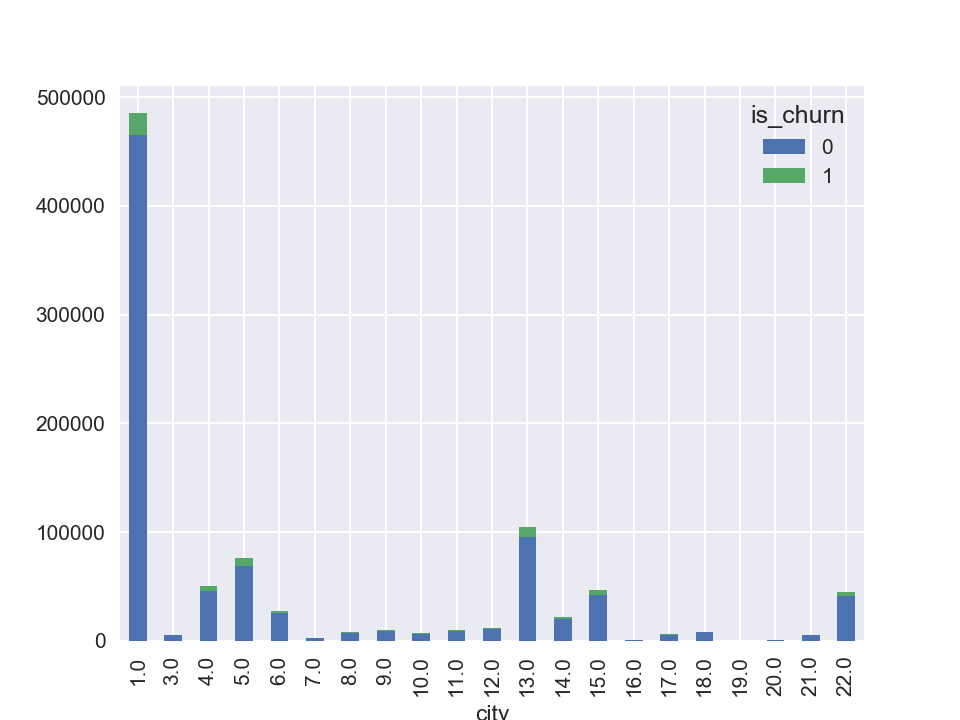

is_churn,0,1,Ratio
city,,,
1.0,464973,20675,0.044465
3.0,4932,449,0.091038
4.0,46263,4258,0.092039
5.0,69199,6518,0.094192
6.0,25524,2293,0.089837
7.0,2639,205,0.077681
8.0,7368,716,0.097177
9.0,9373,836,0.089192
10.0,6273,574,0.091503


In [8]:
city_crosstab=pd.crosstab(train_f['city'],train_f['is_churn'])
city_crosstab.plot(kind='bar', stacked=True, grid=True)
city_crosstab["Ratio"] =  city_crosstab[1] / city_crosstab[0]
city_crosstab

In [9]:
from collections import Counter

> Payment method ID

<IPython.core.display.Javascript object>


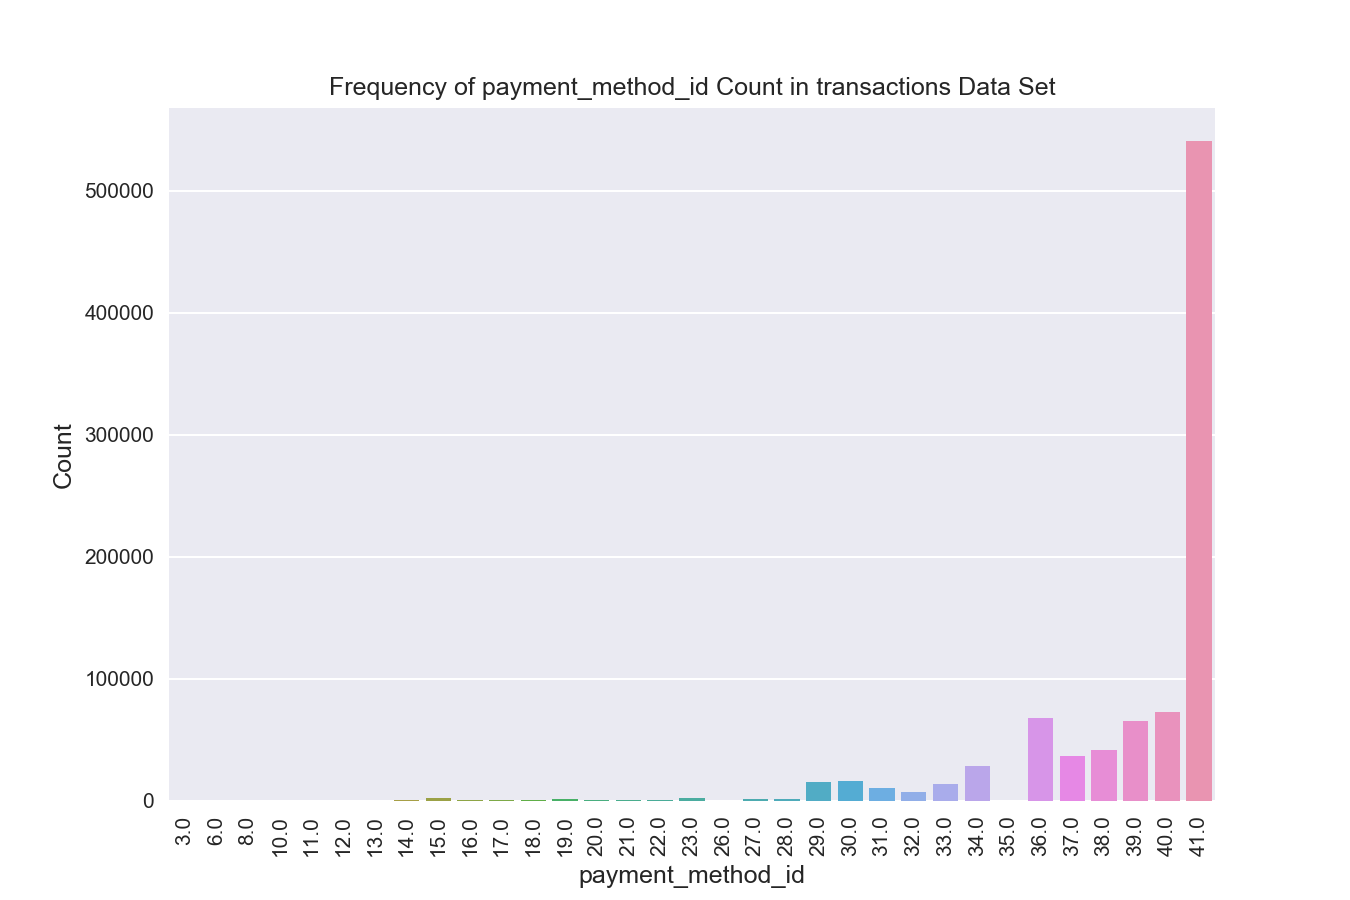

payment_method_id Count [(41.0, 540802), (40.0, 73261), (36.0, 67937), (39.0, 65214), (38.0, 41999), (37.0, 36864), (34.0, 28703), (30.0, 16388), (29.0, 15403), (33.0, 14127), (31.0, 10301), (32.0, 7756), (15.0, 2213), (23.0, 2129), (27.0, 1822), (28.0, 1652), (19.0, 1296), (21.0, 910), (20.0, 833), (16.0, 813), (18.0, 635), (14.0, 544), (17.0, 506), (22.0, 483), (13.0, 305), (35.0, 249), (12.0, 209), (26.0, 89), (11.0, 75), (10.0, 38), (8.0, 9), (3.0, 8), (6.0, 5)]


In [10]:
plt.figure(figsize=(9,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
payment_method_id_count = Counter(train_f['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

> payment plan days

<IPython.core.display.Javascript object>


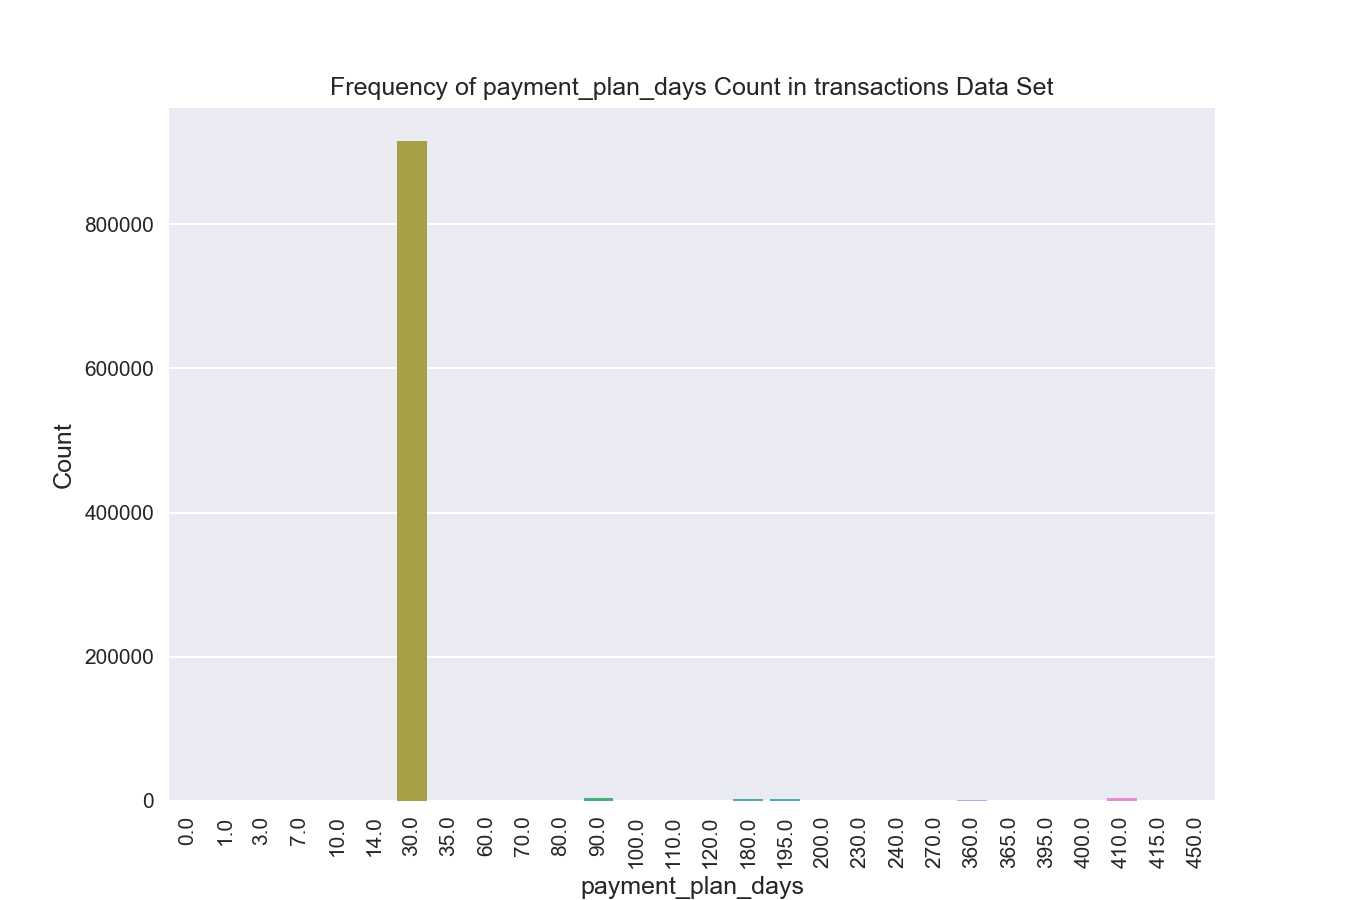

payment_plan_days Count [(30.0, 915274), (410.0, 4455), (90.0, 3689), (180.0, 2929), (195.0, 2925), (360.0, 1221), (100.0, 636), (60.0, 493), (7.0, 409), (395.0, 291), (200.0, 272), (240.0, 189), (120.0, 186), (365.0, 154), (400.0, 150), (1.0, 89), (450.0, 74), (10.0, 59), (14.0, 24), (70.0, 14), (415.0, 12), (80.0, 9), (270.0, 8), (110.0, 7), (35.0, 4), (230.0, 2), (3.0, 2), (0.0, 1)]


In [11]:
# payment_plan_days count in transactions Data Set
plt.figure(figsize=(9,6))
sns.countplot(x="payment_plan_days", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()
payment_plan_days_count = Counter(train_f['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))

> plan list price

<IPython.core.display.Javascript object>


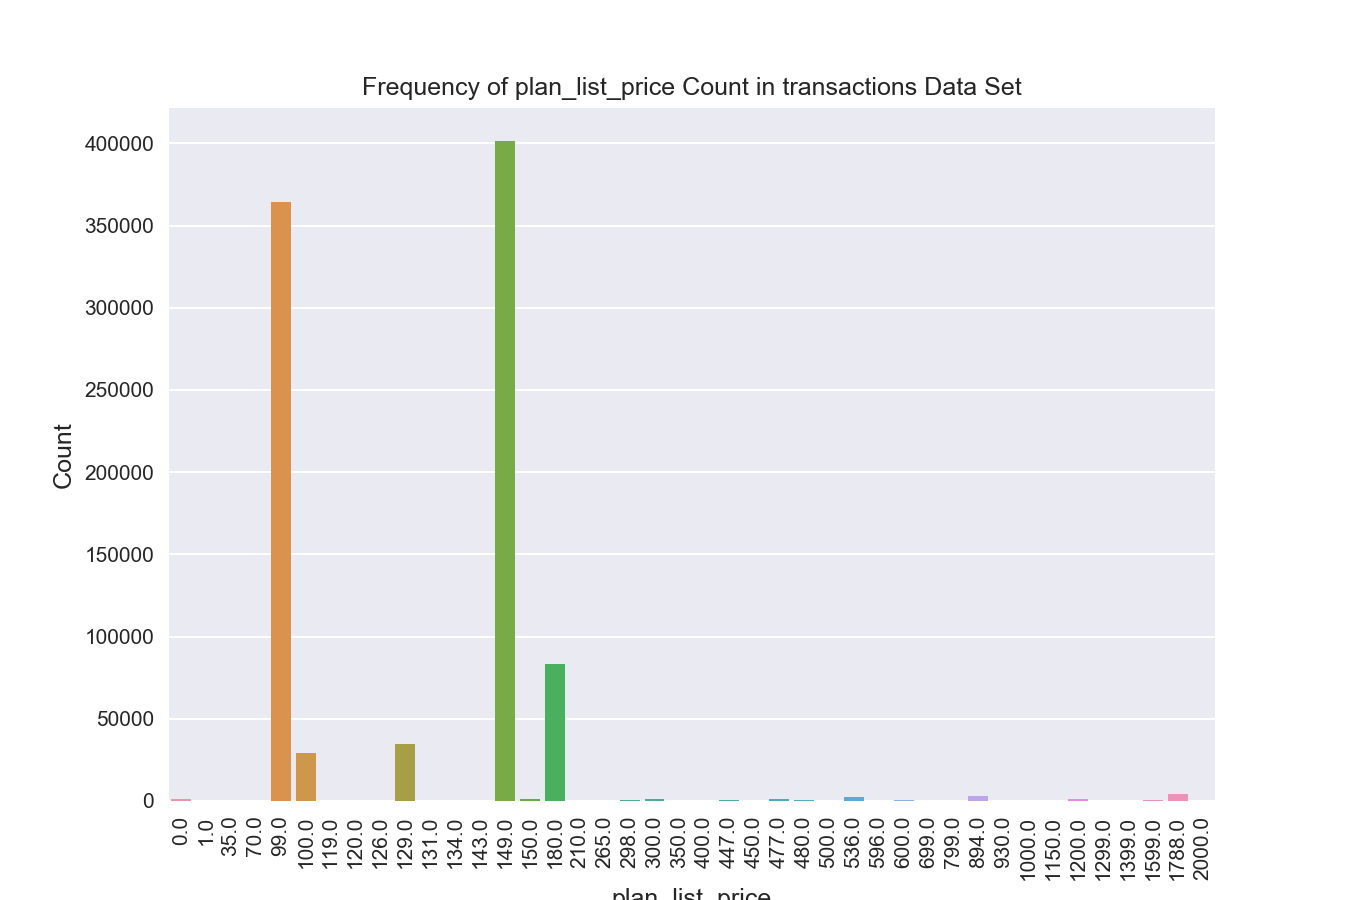

plan_list_price Count [(149.0, 401406), (99.0, 364429), (180.0, 83329), (129.0, 34839), (100.0, 29483), (1788.0, 4526), (894.0, 2931), (536.0, 2321), (300.0, 1455), (150.0, 1439), (1200.0, 1293), (0.0, 1083), (477.0, 1058), (298.0, 726), (447.0, 665), (480.0, 594), (600.0, 532), (1599.0, 447), (930.0, 240), (120.0, 199), (1299.0, 122), (134.0, 95), (799.0, 94), (35.0, 65), (500.0, 42), (450.0, 38), (1000.0, 32), (119.0, 28), (131.0, 18), (350.0, 14), (400.0, 9), (1399.0, 6), (2000.0, 5), (265.0, 3), (1150.0, 2), (1.0, 2), (126.0, 2), (596.0, 2), (699.0, 1), (210.0, 1), (70.0, 1), (143.0, 1)]


In [12]:
plt.figure(figsize=(9,6))
sns.countplot(x="plan_list_price", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()
plan_list_price_count = Counter(train_f['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

> actual amount paid

<IPython.core.display.Javascript object>


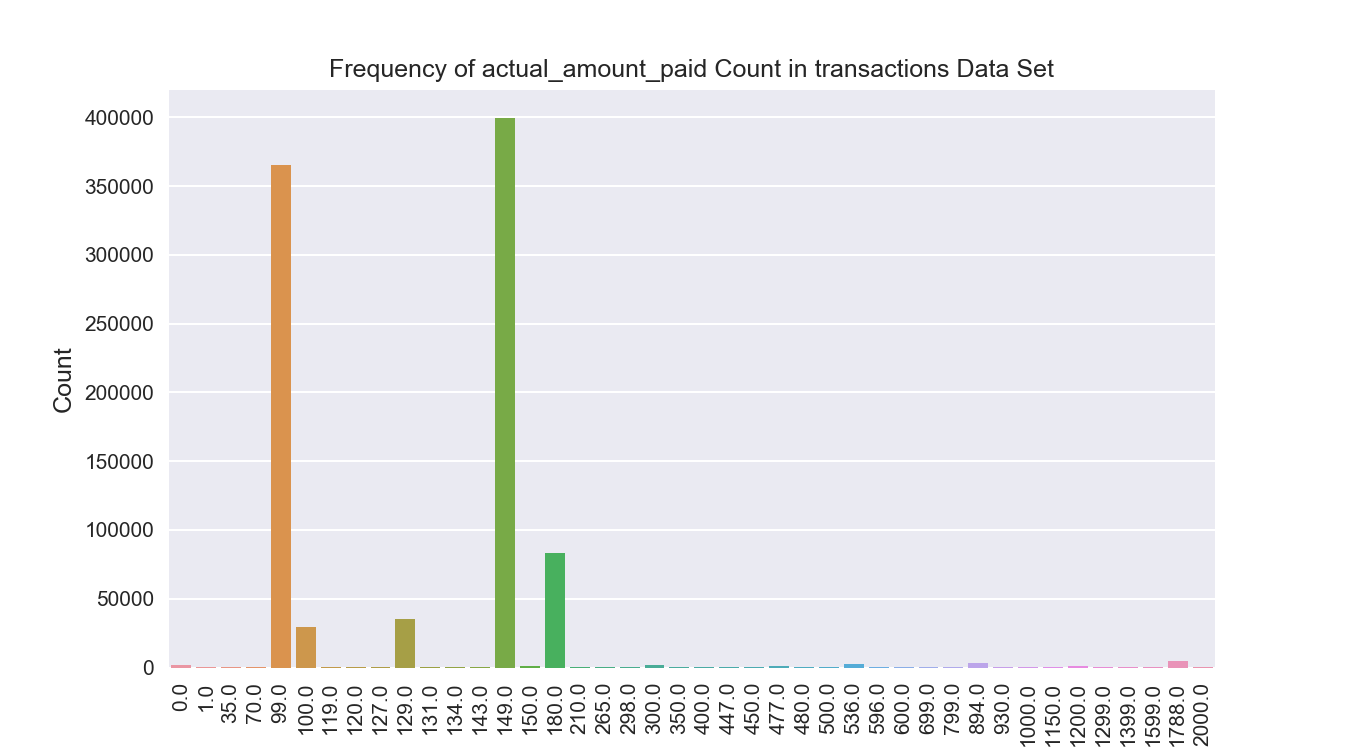

actual_amount_paid Count [(149.0, 399860), (99.0, 364995), (180.0, 83178), (129.0, 35042), (100.0, 29483), (1788.0, 4526), (894.0, 2931), (536.0, 2321), (0.0, 2011), (300.0, 1455), (150.0, 1438), (1200.0, 1293), (477.0, 1058), (298.0, 726), (447.0, 665), (480.0, 594), (600.0, 532), (1599.0, 447), (930.0, 240), (120.0, 191), (1299.0, 122), (134.0, 95), (799.0, 94), (35.0, 65), (500.0, 42), (450.0, 38), (119.0, 37), (1000.0, 32), (131.0, 18), (350.0, 14), (400.0, 9), (1399.0, 6), (2000.0, 5), (265.0, 3), (1150.0, 2), (1.0, 2), (127.0, 2), (596.0, 2), (699.0, 1), (210.0, 1), (70.0, 1), (143.0, 1)]


In [13]:
plt.figure(figsize=(9,5))
sns.countplot(x="actual_amount_paid", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('actual_amount_paid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of actual_amount_paid Count in transactions Data Set", fontsize=12)
plt.show()
actual_amount_paid_count = Counter(train_f['actual_amount_paid']).most_common()
print("actual_amount_paid Count " +str(actual_amount_paid_count))

> is auto renew

<IPython.core.display.Javascript object>


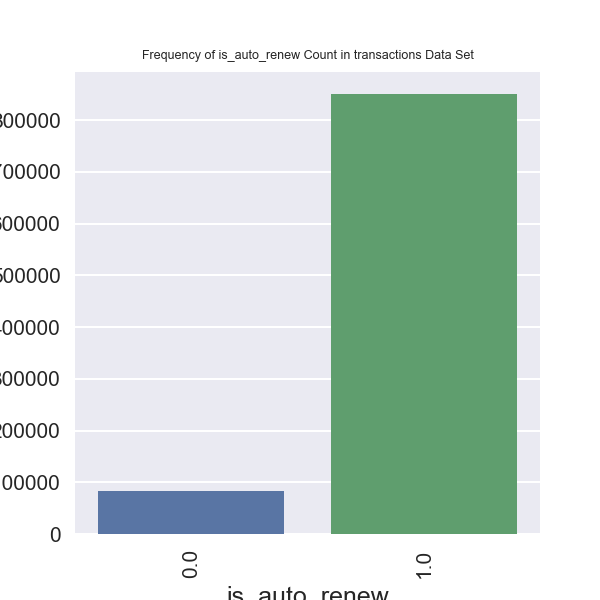

is_auto_renew Count [(1.0, 850658), (0.0, 82920)]


In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_auto_renew Count in transactions Data Set", fontsize=6)
plt.show()
is_auto_renew_count = Counter(train_f['is_auto_renew']).most_common()
print("is_auto_renew Count " +str(is_auto_renew_count))

> is cancel

<IPython.core.display.Javascript object>


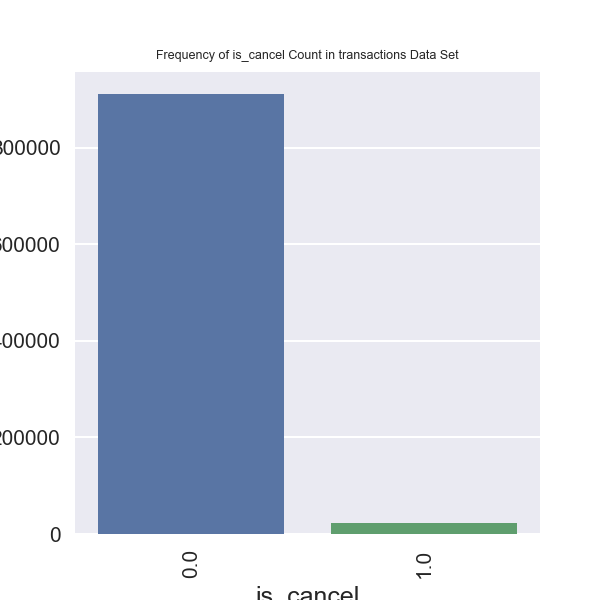

is_cancel Count [(0.0, 910792), (1.0, 22786)]


In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=train_f)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_cancel Count in transactions Data Set", fontsize=6)
plt.show()
is_cancel_count = Counter(train_f['is_cancel']).most_common()
print("is_cancel Count " +str(is_cancel_count))

> registration init time

In [16]:
from datetime import datetime

In [17]:
train_f[train_f['registration_init_time'] < 10000000] = np.nan

In [18]:
train_f['registration_init_time'] = pd.to_datetime(train_f['transaction_date'], format='%Y%m%d')

In [19]:
train_f.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,...,city,gender,registered_via,registration_init_time,age,pro_25,pro_50,pro_75,pro_985,pro_100
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1.0,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0,...,13.0,male,3.0,2017-03-11,20.0,0.000000,0.125000,0.062500,0.000000,0.812500
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1.0,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0,...,13.0,male,3.0,2017-03-14,18.0,0.430631,0.102703,0.057658,0.039640,0.369369
2,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1.0,41.0,30.0,149.0,149.0,1.0,20151208.0,20180108.0,0.0,...,1.0,female,7.0,2015-12-08,38.0,0.160336,0.039255,0.024284,0.027049,0.749077
3,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1.0,41.0,30.0,99.0,99.0,1.0,20170316.0,20170918.0,0.0,...,13.0,female,7.0,2017-03-16,35.0,0.009128,0.007099,0.004057,0.004057,0.975659
4,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1.0,40.0,30.0,149.0,149.0,1.0,20170316.0,20170314.0,1.0,...,22.0,female,3.0,2017-03-16,26.0,0.122449,0.020408,0.020408,0.081633,0.755102


<IPython.core.display.Javascript object>


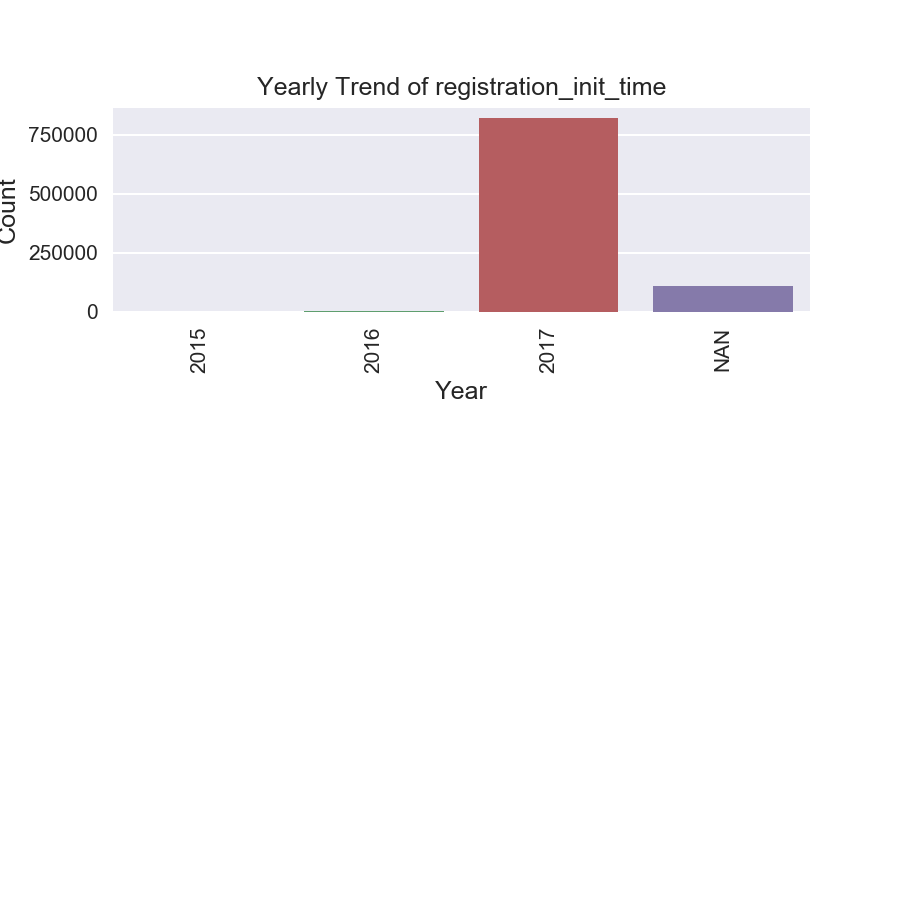

Yearly Count [(2017, 822414), ('NAN', 108210), (2016, 1793), (2015, 1161)]


<IPython.core.display.Javascript object>


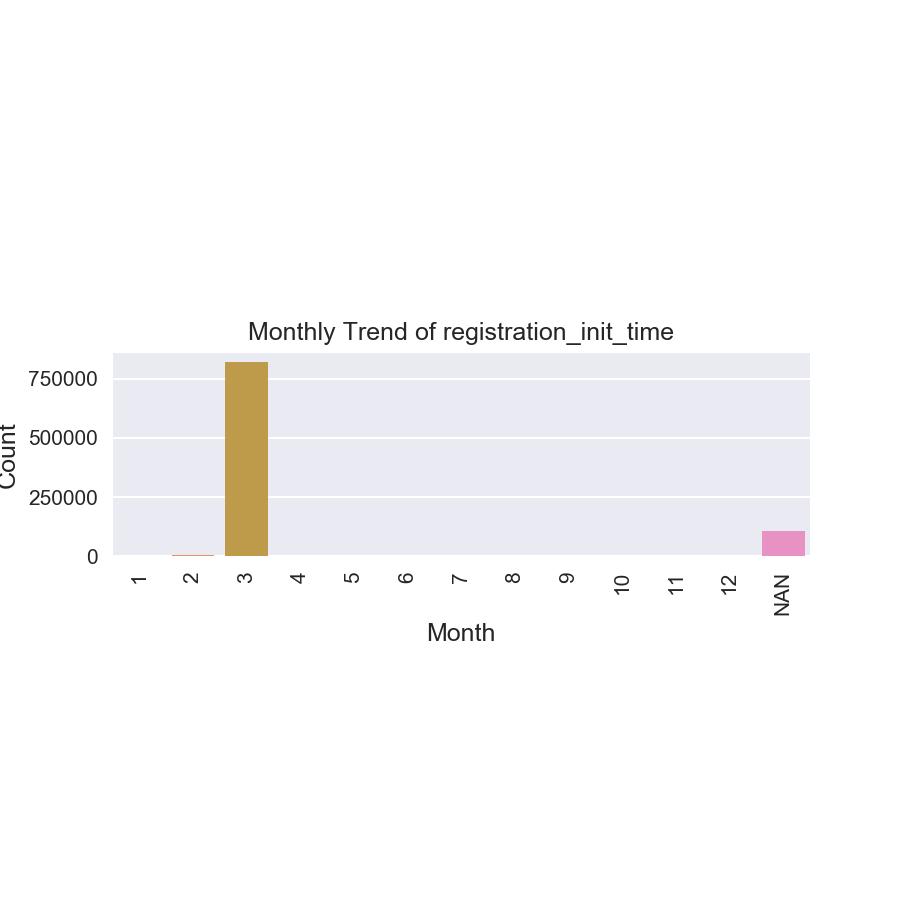

Monthly Count [(3, 818326), ('NAN', 108210), (2, 3901), (12, 1582), (1, 999), (11, 256), (10, 124), (9, 54), (8, 42), (7, 41), (4, 18), (5, 14), (6, 11)]


<IPython.core.display.Javascript object>


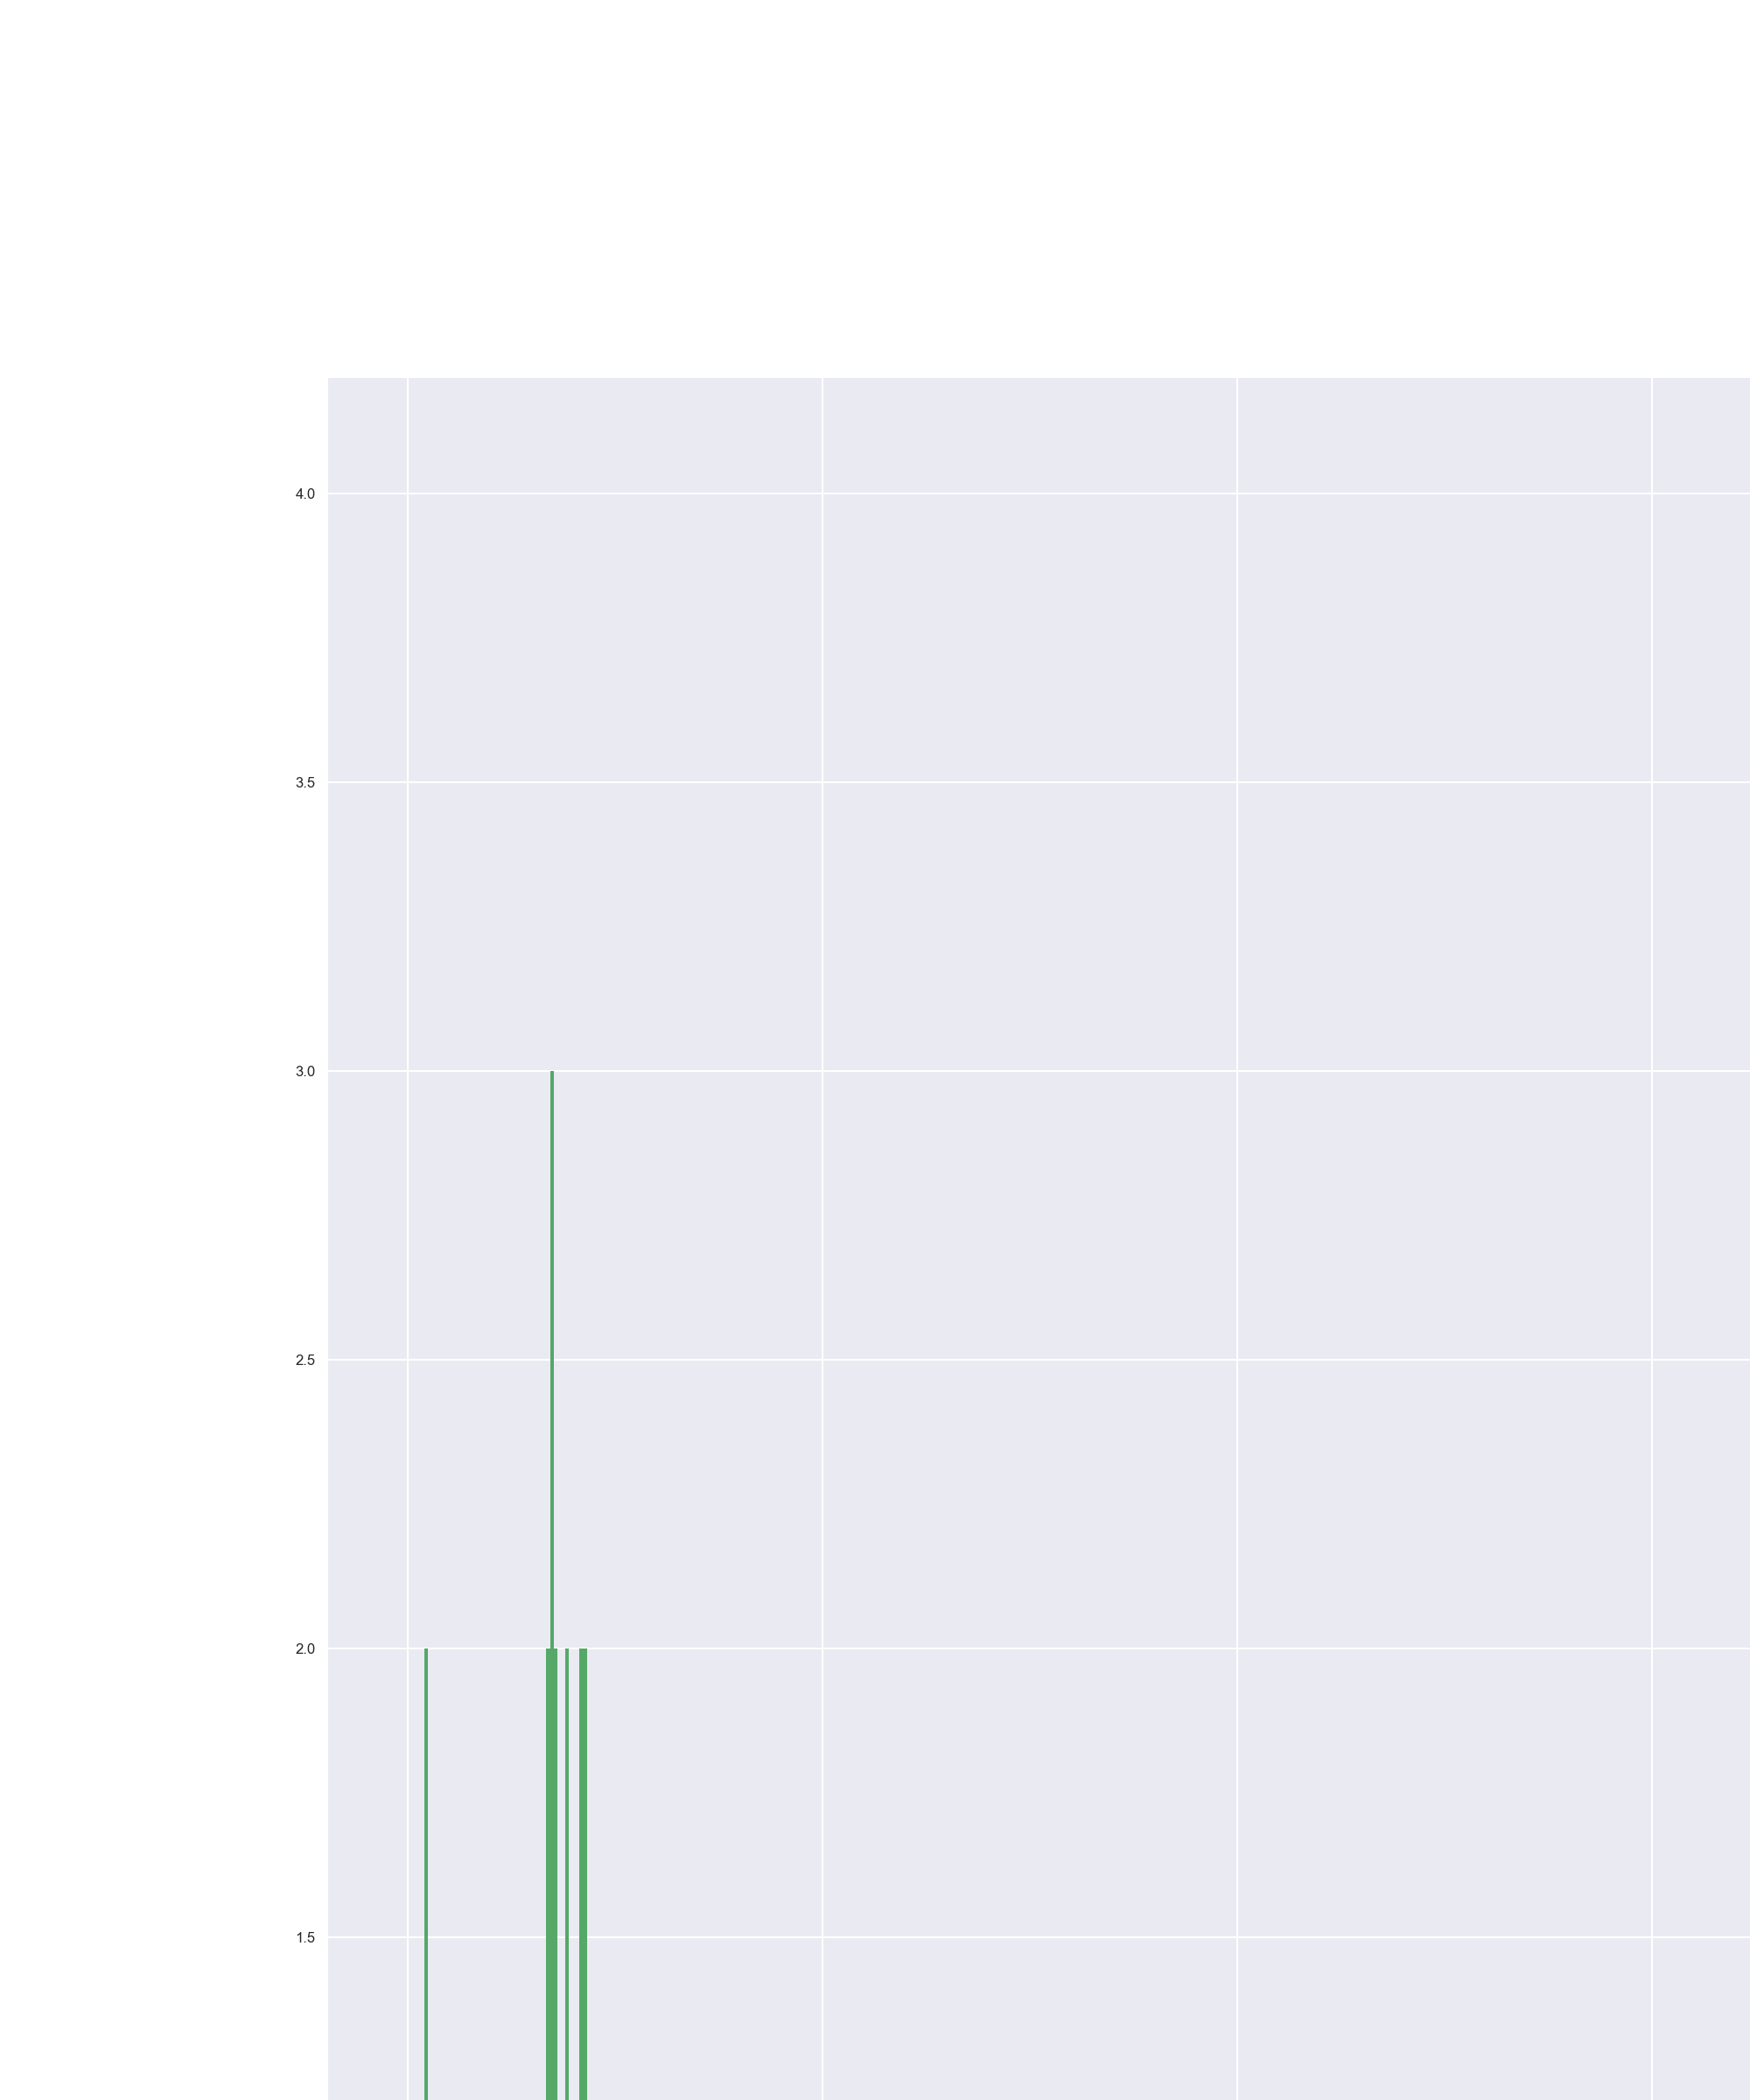

Day-wise Count [('Friday', 260764), ('NAN', 108210), ('Sunday', 99590), ('Saturday', 98698), ('Thursday', 98400), ('Wednesday', 96380), ('Monday', 89541), ('Tuesday', 81995)]


In [20]:
#registration_init_time yearly trend
train_f['registration_init_time_year'] = pd.DatetimeIndex(train_f['registration_init_time']).year
train_f['registration_init_time_year'] = train_f.registration_init_time_year.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
year_count=train_f['registration_init_time_year'].value_counts()
#print(year_count)
plt.figure(figsize=(6,6))
plt.subplot(311)
year_order = train_f['registration_init_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
year_order = sorted(year_order, key=lambda x: float(x))
sns.barplot(year_count.index, year_count.values,order=year_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Yearly Trend of registration_init_time", fontsize=12)
plt.show()
year_count_2 = Counter(train_f['registration_init_time_year']).most_common()
print("Yearly Count " +str(year_count_2))

#registration_init_time monthly trend
train_f['registration_init_time_month'] = pd.DatetimeIndex(train_f['registration_init_time']).month
train_f['registration_init_time_month'] = train_f.registration_init_time_month.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
month_count=train_f['registration_init_time_month'].value_counts()
plt.figure(figsize=(6,6))
plt.subplot(312)
month_order = train_f['registration_init_time_month'].unique()
month_order = sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monthly Trend of registration_init_time", fontsize=12)
plt.show()
month_count_2 = Counter(train_f['registration_init_time_month']).most_common()
print("Monthly Count " +str(month_count_2))

#registration_init_time day wise trend
train_f['registration_init_time_weekday'] = pd.DatetimeIndex(train_f['registration_init_time']).weekday_name
train_f['registration_init_time_weekday'] = train_f.registration_init_time_weekday.apply(lambda x: str(x) if pd.notnull(x) else "NAN" )
day_count=train_f['registration_init_time_weekday'].value_counts()
plt.figure(figsize=(6,6))
plt.subplot(313)
#day_order = training['registration_init_time_day'].unique()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','NAN']
sns.barplot(day_count.index, day_count.values,order=day_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Day-wise Trend of registration_init_time", fontsize=12)
plt.show()
day_count_2 = Counter(train_f['registration_init_time_weekday']).most_common()
print("Day-wise Count " +str(day_count_2))

# Preprocessing

## 1. members.csv

In [22]:
train = pd.read_csv("train_v2.csv")
members = pd.read_csv("members_v3.csv")

In [23]:
train.tail()

,msno,is_churn
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0
970959,oECkzJik4wKsbOEVY6UACLbmgM8qymFdb5cJaHrodY8=,0


In [24]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020
6769472,isBt+JlgvZRNy6lxVr5vvuJ4lD00ofTaKyJ+uRnGcPg=,1,0,NaN,4,20151021


In [25]:
tm = pd.merge(train, members, how = 'left')

In [26]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      860967 non-null float64
bd                        860967 non-null float64
gender                    388905 non-null object
registered_via            860967 non-null float64
registration_init_time    860967 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


### 나이 데이터의 이상값 처리

In [27]:
# bd 는 나이를 의미한다.
tm["bd"].describe()

count    860967.000000
mean         13.583854
std          20.064040
min       -3152.000000
25%           0.000000
50%           0.000000
75%          27.000000
max        2016.000000
Name: bd, dtype: float64

- 내부적으로 어떻게 나이를 계산했을지 생각해보자.
- 2017 - 사용자가 입력한 생년월일의 '년도' = 나이 로 계산했을 것이다.

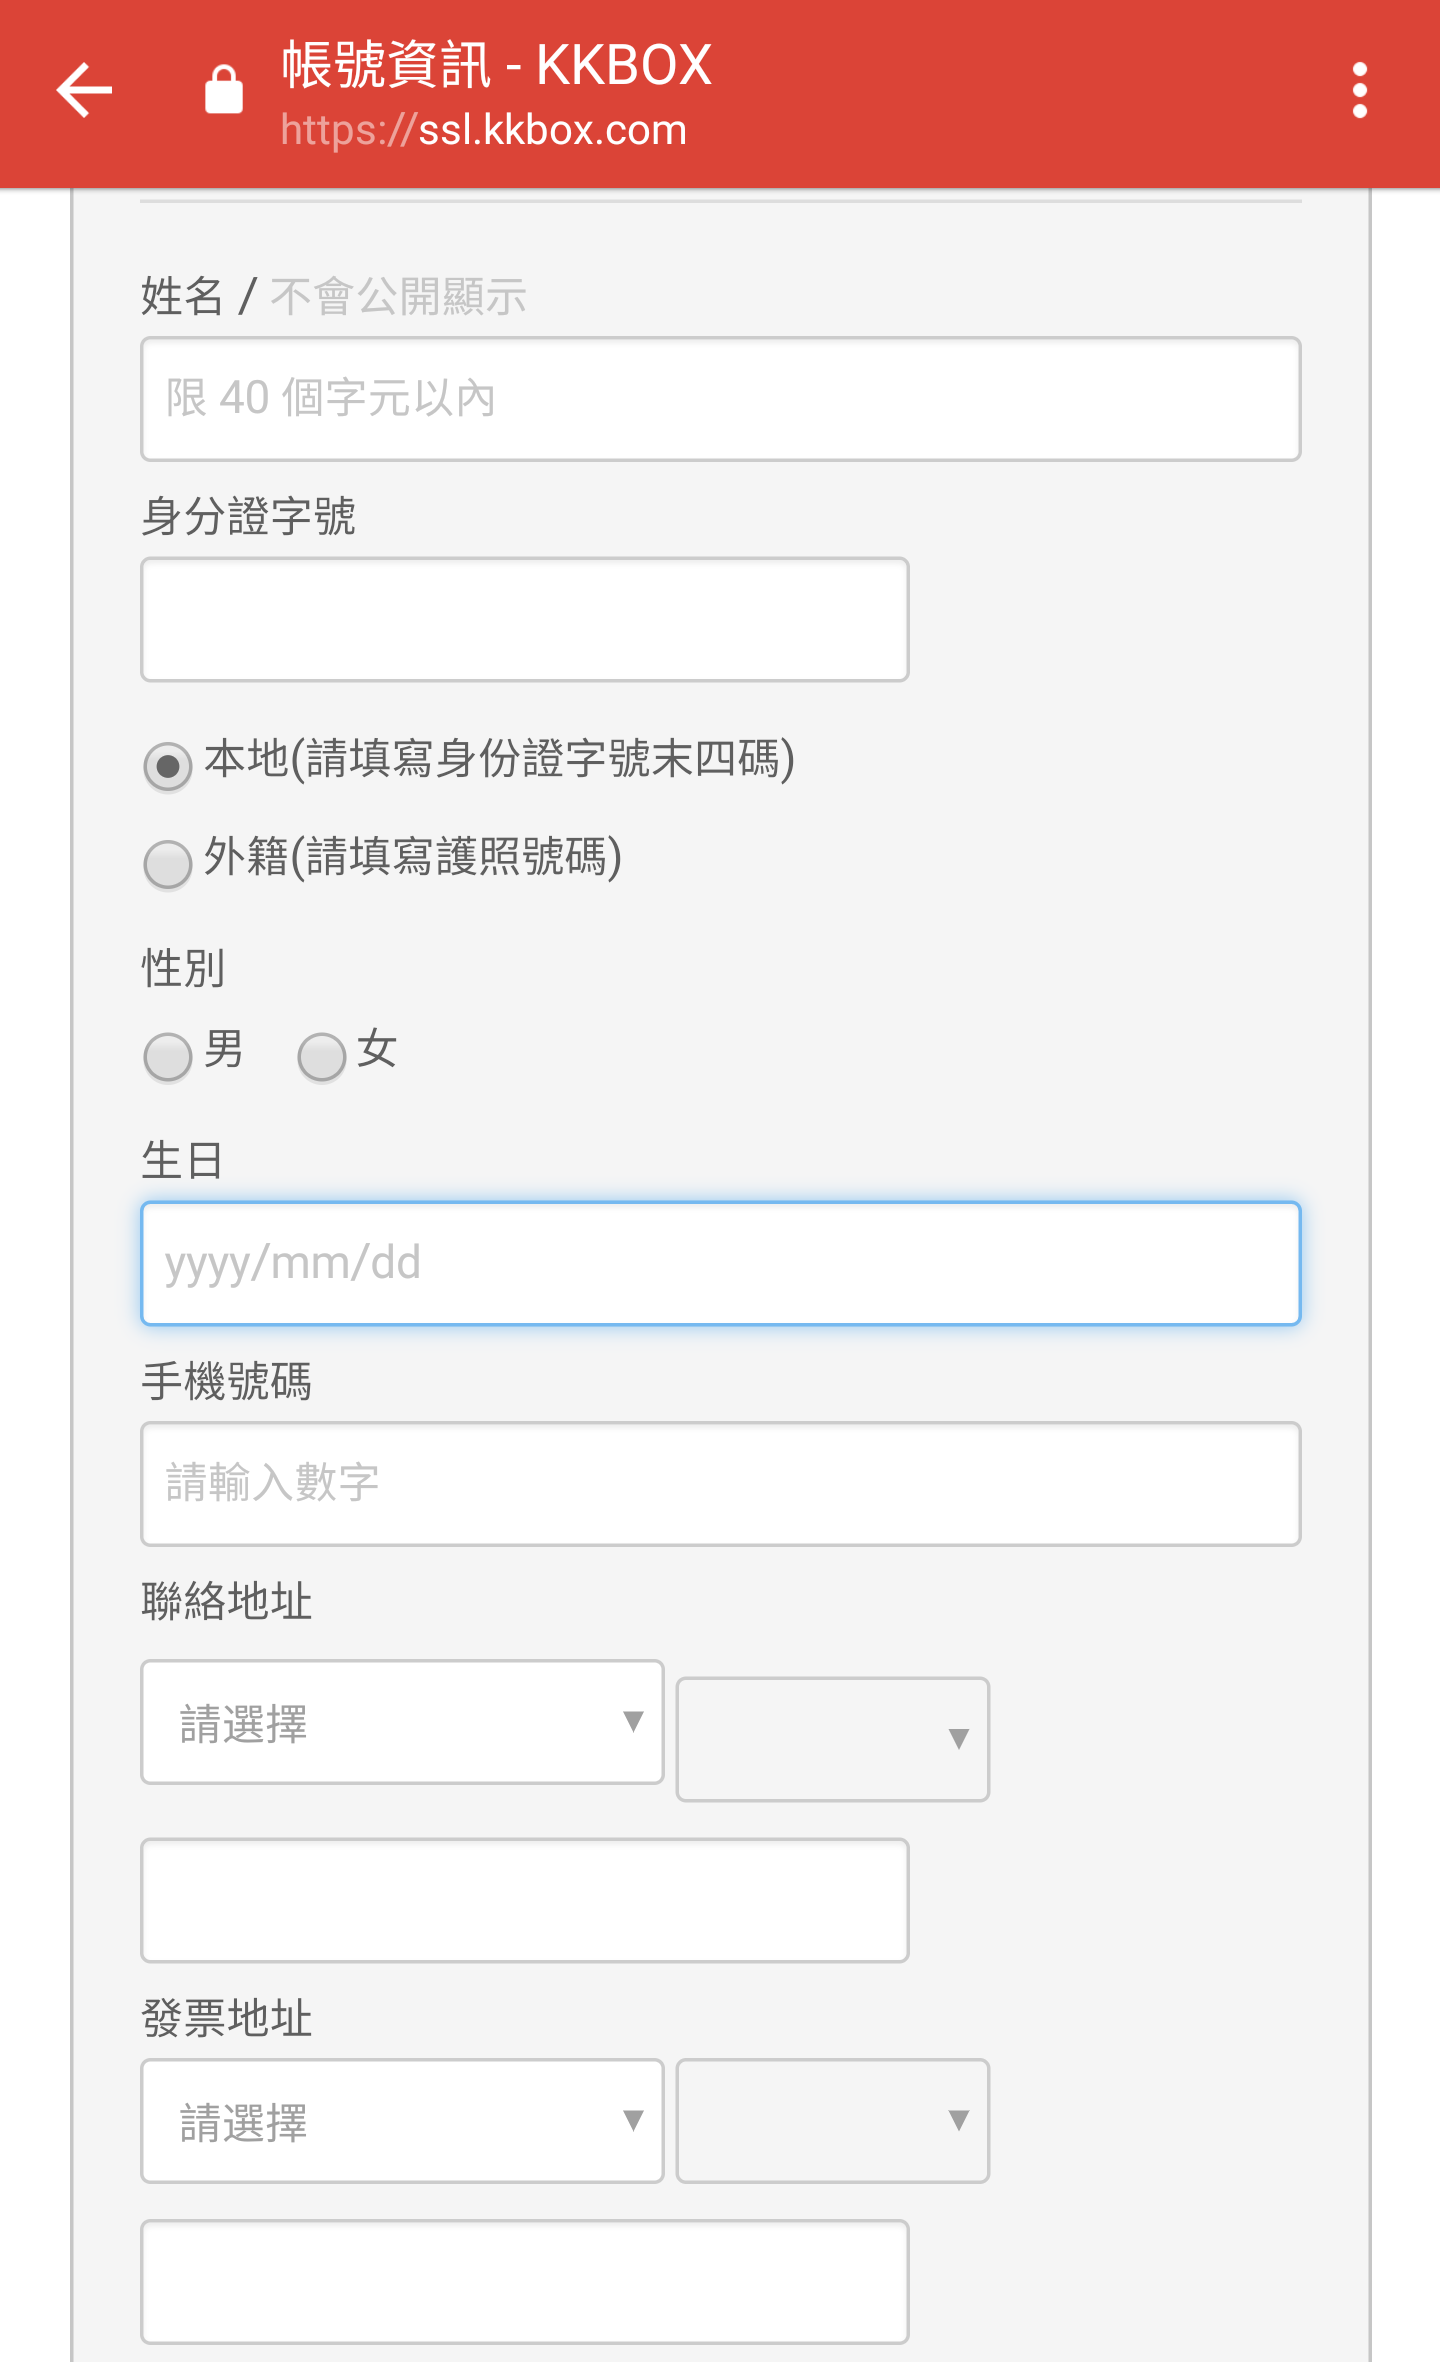

In [28]:
pil.open('bd.png')

- 추측 : 나이 이상값들은 생년월일을 잘못 입력하여 생긴 계산 오류이다.
- 예를들어 -3152살 데이터는 2017 - (-3152) = 5169 은 51년 6월 9일 을 의미한다.

In [29]:
tm["birth"] = 2017 - tm["bd"]
tm["birth"].describe()

count    860967.000000
mean       2003.416146
std          20.064040
min           1.000000
25%        1990.000000
50%        2017.000000
75%        2017.000000
max        5169.000000
Name: birth, dtype: float64

In [30]:
# 도저히 추측할 수 없는 데이터는 인덱스를 모아두기로 한다.
idx = []

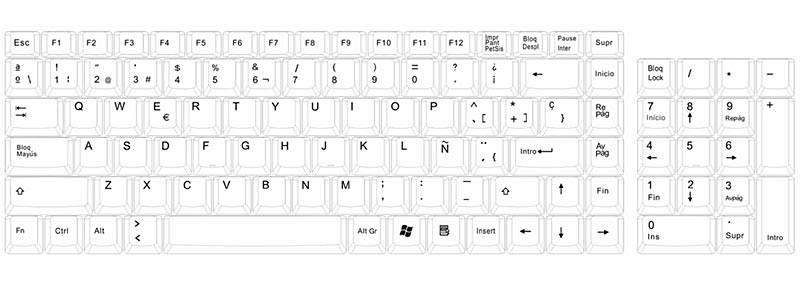

In [31]:
pil.open('keyboard.jpg')

### 0년 ~ 1000년 이라고 입력한 데이터
- 19를 09로 잘못 눌렀을 것으로 추측 > 1995년을 0995로 입력한다던지

### 1000년 ~ 1900년 이라고 입력한 데이터
- 히스토그램을 보면 양 쪽에 편중되어 있다. 키보드의 모양을 생각해보자.
- 예를 들어, 9를 눌러야하는데 6 혹은 8을 잘못누른 경우도 있지 않을까
- 근거 : 년도 **** 중 뒤에서 두 자리 **가 80 ~ 90 에 편중되어있다. 80~90년대를 의미한다. 즉, 1895는 1995를 잘못 누른거다.

In [32]:
tm["birth"][tm["birth"]>1000][tm["birth"]<1900]

2706      1696.0
23733     1067.0
54777     1073.0
107670    1898.0
135255    1053.0
167462    1879.0
181612    1797.0
279360    1895.0
288604    1888.0
294052    1891.0
310686    1889.0
323431    1878.0
330680    1873.0
331013    1685.0
347415    1820.0
358887    1694.0
370293    1898.0
376173    1067.0
388375    1274.0
392931    1076.0
393569    1076.0
397879    1071.0
401393    1086.0
402532    1869.0
433939    1056.0
436589    1677.0
441405    1070.0
449978    1197.0
472097    1884.0
495310    1887.0
           ...  
654663    1069.0
662214    1797.0
667082    1180.0
693220    1087.0
693727    1072.0
702587    1083.0
712417    1857.0
719706    1878.0
725746    1896.0
728945    1889.0
766862    1008.0
767709    1231.0
790310    1886.0
805441    1078.0
808097    1086.0
811396    1885.0
812169    1191.0
812713    1084.0
843935    1193.0
858012    1894.0
875323    1698.0
887213    1111.0
887645    1895.0
888266    1009.0
892229    1239.0
914277    1006.0
922822    1075.0
923515    1689

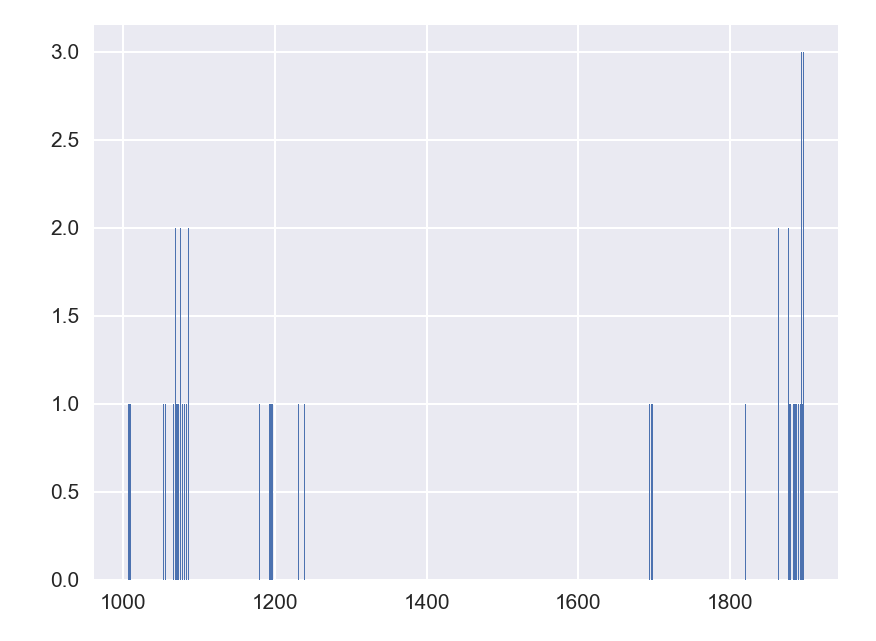

In [36]:
pil.open('graph.png')

### 2007 ~ 2017 데이터 : 10살 이하 
- 제거

### 2017 데이터
- 절반이 2017이다. 아예 생년월일을 입력안한 데이터. 그래서 0 으로 나오는 듯

In [37]:
len(tm[tm["birth"] == 2017])

473729

### 2017 ~ 2100 데이터
- 19를 20으로 잘못 입력한 데이터. 이것도 뒤 두자리가 80 ~ 90에 편중되어있다.

### 2100 ~ 데이터
- 년도에서 앞의 두자리를 빠뜨린 것

In [38]:
tm["birth"][tm["birth"] > 2100]

564832    5169.0
566030    4845.0
570305    2195.0
Name: birth, dtype: float64

#### 결론 :  나이 데이터가 전처리 후 평균이 1987년생으로 30살이었다. 스트리밍 서비스를 이용하는 세대의 평균으로서 적당한 것 같다

### 성별과 도시처럼 추측 불가능한 데이터들에 대해서는 확률을 계산하여 랜덤으로 채워주었다.

In [39]:
def random(column, data, n):
    name_list, number_column = np.unique(data[column][data[column].isnull() == False].values, return_counts=True)
    rate_column = number_column/len(data[column][data[column].isnull() == False])
    return np.random.choice(name_list, n, p = rate_column)

## 2. user_log.csv

In [41]:
user = pd.read_csv("user_logs_v2.csv")

In [42]:
user.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [43]:
# 데이터 개수
len(user)

18396362

In [44]:
# 중복되지 않는 ID 개수
len(user["msno"].unique())

1103894

In [45]:
# ID 별로 노래 들은 횟수 합하기
user_n = user.groupby("msno").sum()[["num_25","num_50","num_75","num_985","num_100","num_unq","total_secs"]].reset_index()

In [46]:
len(user_n)

1103894

In [47]:
user_n.head(7)

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247
5,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,74,18,10,1,130,223,36636.638
6,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,5,4,4,2,40,39,10243.065


In [48]:
## train데이터와 merge
data_user = pd.merge(train, user_n, how='left')

In [49]:
# NAN값 0으로 바꾸기
data_user = data_user.fillna(value = 0)

In [50]:
data_user.head()

,msno,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,186.0,23.0,13.0,10.0,318.0,348.0,80598.557
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,0.0,4.0,2.0,0.0,26.0,30.0,6986.509
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,239.0,57.0,32.0,22.0,205.0,432.0,67810.467
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,9.0,7.0,4.0,4.0,962.0,548.0,239882.241


In [ ]:
for i in range(len(data_user)):
    s = data_user['num_25'][i] + data_user['num_50'][i] + data_user['num_75'][i] + data_user['num_985'][i] + data_user['num_100'][i]
    u = data_user['num_25'][i]
    if s == 0:
        data_user.at[i, "pro_25"] = 0
    else:
        data_user.at[i, "pro_25"] = u / s
        
for i in range(len(data_user)):
    s = data_user['num_25'][i] + data_user['num_50'][i] + data_user['num_75'][i] + data_user['num_985'][i] + data_user['num_100'][i]
    u = data_user['num_50'][i]
    if s == 0:
        data_user.at[i, "pro_50"] = 0
    else:
        data_user.at[i, "pro_50"] = u / s
        
for i in range(len(data_user)):
    s = data_user['num_25'][i] + data_user['num_50'][i] + data_user['num_75'][i] + data_user['num_985'][i] + data_user['num_100'][i]
    u = data_user['num_75'][i]
    if s == 0:
        data_user.at[i, "pro_75"] = 0
    else:
        data_user.at[i, "pro_75"] = u / s
        
for i in range(len(data_user)):
    s = data_user['num_25'][i] + data_user['num_50'][i] + data_user['num_75'][i] + data_user['num_985'][i] + data_user['num_100'][i]
    u = data_user['num_985'][i]
    if s == 0:
        data_user.at[i, "pro_985"] = 0
    else:
        data_user.at[i, "pro_985"] = u / s
        
for i in range(len(data_user)):
    s = data_user['num_25'][i] + data_user['num_50'][i] + data_user['num_75'][i] + data_user['num_985'][i] + data_user['num_100'][i]
    u = data_user['num_100'][i]
    if s == 0:
        data_user.at[i, "pro_100"] = 0
    else:
        data_user.at[i, "pro_100"] = u / s

In [ ]:
## number column 제거
data_user = data_user.drop(["num_25", "num_50", "num_75", "num_985", "num_100"], axis=1)

In [ ]:
user_logs = pd.DataFrame(user['msno'].value_counts().reset_index())
user_logs.columns = ['msno','logs_count']
data_user = pd.merge(data_user, user_logs, how='left', on='msno')

#### 결론

- Id 별로 구간별(25/ 50/ 75/ 985/ 100)로 들은 횟수 합친 후 proportion으로 바꿈
- Nan 값은 0으로 바꿈
- Id 별로 row 개수 합친 count column 추가

## 3. Transaction.csv

In [52]:
transactions = pd.read_csv('transactions_v2.csv')

In [53]:
train.shape, transactions.shape

((970960, 2), (1431009, 9))

In [54]:
print(train.isnull().sum())
print(transactions.isnull().sum())

msno        0
is_churn    0
dtype: int64
msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64


In [55]:
# transaction_date의 최신 날짜를 기준으로 merge
train_transaction = pd.merge(train, transactions, how='left')
train_transaction.shape

(1169418, 10)

In [56]:
train_transaction = train_transaction.sort_values(by=['transaction_date'], ascending=False).reset_index(drop=True)
train_transaction = train_transaction.drop_duplicates(subset=['msno'], keep='first')

In [57]:
train_transaction.shape

(970960, 10)

In [58]:
train_transaction.isnull().sum()

msno                          0
is_churn                      0
payment_method_id         37382
payment_plan_days         37382
plan_list_price           37382
actual_amount_paid        37382
is_auto_renew             37382
transaction_date          37382
membership_expire_date    37382
is_cancel                 37382
dtype: int64

In [59]:
train_transaction = train_transaction.dropna(axis=0, how='any')
train_transaction.shape

(933578, 10)

In [60]:
train_transaction['is_churn'] = train_transaction['is_churn'].astype('object')
train_transaction['payment_method_id'] = train_transaction['payment_method_id'].astype('object')
train_transaction['payment_plan_days'] = train_transaction['payment_plan_days'].astype('object') 
train_transaction['is_auto_renew'] = train_transaction['is_auto_renew'].astype('object')
train_transaction['is_cancel'] = train_transaction['is_cancel'].astype('object')

In [61]:
# drop 'plan_list_price' column > 다중공산성
train_transaction.drop('plan_list_price', axis = 1, inplace=True)

# Modeling

In [248]:
tr = pd.read_csv("train_final_ordinal.csv")

In [249]:
trs = pd.read_csv("transactions_v2.csv")

In [250]:
trs = trs.groupby("msno").size().reset_index(name='counts') 

In [251]:
tr = pd.merge(tr, trs, how ='left')

In [252]:
X = tr.drop(["msno", "is_churn"], axis = 1)
Y = tr["is_churn"]

In [253]:
X.columns

Index(['payment_method_id', 'payment_plan_days', 'actual_amount_paid',
       'is_auto_renew', 'transaction_date', 'membership_expire_date',
       'is_cancel', 'num_unq', 'total_secs', 'city', 'gender',
       'registered_via', 'registration_init_time', 'age', 'pro_25', 'pro_50',
       'pro_75', 'pro_985', 'pro_100', 'disc_user', 'counts'],
      dtype='object')

In [254]:
test = pd.read_csv("test_final_ordinal.csv")

In [255]:
test.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'num_unq', 'total_secs', 'city',
       'gender', 'registered_via', 'registration_init_time', 'age', 'pro_25',
       'pro_50', 'pro_75', 'pro_985', 'pro_100', 'disc_user'],
      dtype='object')

In [256]:
test = pd.merge(test, trs, how ='left')

In [257]:
result = test.drop(["msno", "is_churn"], axis = 1)

In [258]:
result.columns

Index(['payment_method_id', 'payment_plan_days', 'actual_amount_paid',
       'is_auto_renew', 'transaction_date', 'membership_expire_date',
       'is_cancel', 'num_unq', 'total_secs', 'city', 'gender',
       'registered_via', 'registration_init_time', 'age', 'pro_25', 'pro_50',
       'pro_75', 'pro_985', 'pro_100', 'disc_user', 'counts'],
      dtype='object')

In [259]:
categoric_list = ['payment_method_id', 'payment_plan_days', 'city', 'registered_via', 'is_auto_renew', 'is_cancel', 'gender', 'disc_user']

In [137]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import time

X_train, X_validation, Y_train,Y_validation = train_test_split(X, Y ,test_size=0.2, random_state = 7)

d_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_validation, Y_validation)
        
pred_test = pd.DataFrame(result.index)
parameters = pd.DataFrame({
                                         "1Learning_rate":[0],
                                         "2max_depth":[0],
                                         "3feature_fraction" : [0],
                                         "4num_leaves" : [0],
                                         "5precision":[0],
                                         "6recall" : [0],
                                         "7f_score":[0]
})

learning_rate = [0.005, 0.01]
max_depth = [2, 3, 5]
feature_fraction = [0.6, 0.7, 0.8]

auc = 0

for lr in learning_rate:
    for depth in max_depth:
        for fraction in feature_fraction:
            
            max_leaves = 2**depth
            num_leaves = [int(max_leaves*1.0), int(max_leaves*0.8), int(max_leaves*0.6)]
            
            for leaves in num_leaves:
                
           
                params = {"learning_rate" : lr, 'application': 'binary', 
                                             "max_depth" : depth,
                                             "bagging_fraction" : 1,
                                             'feature_fraction' : fraction,
                                             'num_leaves' : leaves,
                                             'metric' : 'binary_logloss',
                                             'verbosity' : -1}
                    

                
                s = time.time()
                model = lgb.train(params, d_train ,
                                        num_boost_round=500,
                                        valid_sets=lgb_eval,
                                        early_stopping_rounds=100,
                                        verbose_eval = 100
                                        )
                print(time.time() - s)
                
                lgb_pred = model.predict(X_validation)
                
                for i in range(len(lgb_pred)):
                    if lgb_pred[i] > 0.5:
                        lgb_pred[i] = 1
                    else:
                        lgb_pred[i] = 0
    
                
                tmp = precision_recall_fscore_support(Y_validation, lgb_pred)

                r =  pd.DataFrame({
                                                     "1Learning_rate":[lr],
                                                     "2max_depth":[depth],
                                                     "3feature_fraction" : [fraction],
                                                     "4num_leaves" : [leaves],
                                                     "5precision" : tmp[0][1],
                                                     "6recall" : tmp[1][1],
                                                     "7f_score" : tmp[2][1]
                                                       })
                parameters = r.append(parameters)
                print("Parameters : LR {}, depth {}, fractions {}, leaves {}, precision {:6f}, recall {:6f}, f_score {:6f}"
                             .format(lr, depth, fraction, leaves, tmp[0][1], tmp[1][1], tmp[2][1]))
                
                if tmp[2][1] > auc:
                    auc = tmp[2][1]
                    print("Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters!")

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.923487
[200]	valid_0's auc: 0.948263
[300]	valid_0's auc: 0.948521
[400]	valid_0's auc: 0.953508
[500]	valid_0's auc: 0.953356
Did not meet early stopping. Best iteration is:
[403]	valid_0's auc: 0.953517
32.36149191856384
Parameters : LR 0.005, depth 2, fractions 0.6, leaves 4, precision 0.905566, recall 0.676839, f_score 0.774672
Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters! Best Parameters!
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.923285
[200]	valid_0's auc: 0.947363
[300]	valid_0's auc: 0.947403
[400]	valid_0's auc: 0.948622
[500]	valid_0's auc: 0.9486
Did not meet early stopping. Best iteration is:
[409]	valid_0's auc: 0.948661
29.743107795715332
Parameters : LR 0.005, depth 2, fractions 0.6, leaves 3, precision 0.901870, recall 0.678459, f_score 0.774372
Training until validation scores don't imp

KeyboardInterrupt: 

> Best  Parameters : LR 0.01, depth 5, fractions 0.8, leaves 32, precision 0.939469, recall 0.811014, f_score 0.870528

In [ ]:
# 설명 가능한 모델

In [278]:
lgb_params = {
   'learning_rate': 0.01,
   'application': 'binary',
   'max_depth': 5,
   'num_leaves': 32,
   'verbosity': -1,
   'metric': 'binary_logloss',
   'feature_fraction': 0.6,
}


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 7)

d_train = lgb.Dataset(X, label = Y)
d_valid = lgb.Dataset(X_validation, label = Y_validation)

watchlist = [d_train, d_valid]

model = lgb.train(lgb_params, train_set = d_train,  num_boost_round = 500, valid_sets = watchlist, early_stopping_rounds = 100, verbose_eval = 100, categorical_feature=categoric_list)

C:\Users\jeongin\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is ['city', 'disc_user', 'gender', 'is_auto_renew', 'is_cancel', 'payment_method_id', 'payment_plan_days', 'registered_via']
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\jeongin\Anaconda3\lib\site-packages\lightgbm\basic.py:681: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.239825	valid_1's binary_logloss: 0.239607
[200]	training's binary_logloss: 0.118157	valid_1's binary_logloss: 0.117771
[300]	training's binary_logloss: 0.0757249	valid_1's binary_logloss: 0.0753085
[400]	training's binary_logloss: 0.0569839	valid_1's binary_logloss: 0.0563402
[500]	training's binary_logloss: 0.0490617	valid_1's binary_logloss: 0.048389
Did not meet early stopping. Best iteration is:
[500]	training's binary_logloss: 0.0490617	valid_1's binary_logloss: 0.048389


In [283]:
lgb_pred = model.predict(X_validation)
                
for i in range(len(lgb_pred)):
    if lgb_pred[i] > 0.5:
                        lgb_pred[i] = 1
    else:
                        lgb_pred[i] = 0
    
                
tmp = precision_recall_fscore_support(Y_validation, lgb_pred)
tmp

(array([0.9877302 , 0.93912617]),
 array([0.99645684, 0.81536101]),
 array([0.99207433, 0.87287826]),
 array([174985,  11731], dtype=int64))

In [279]:
importances = pd.DataFrame({"Feature":X.columns, "Imps":model.feature_importance()}).sort_values(by="Imps", ascending=False)

importances

,Feature,Imps
5,membership_expire_date,3971
4,transaction_date,2739
20,counts,1698
2,actual_amount_paid,1672
0,payment_method_id,1212
7,num_unq,708
3,is_auto_renew,581
6,is_cancel,561
12,registration_init_time,544
8,total_secs,362


In [280]:
pred = model.predict(result)

In [281]:
final = test[["msno", "is_churn" ]]
final["is_churn"] = pred

C:\Users\jeongin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [282]:
final.to_csv('final_result1.csv', header=True,  index = False)

# 의문스러웠던 점

In [ ]:
lgb_params = {
   'learning_rate': 0.005,
   'application': 'binary',
   'max_depth': 1,
   'num_leaves': 128,
   'verbosity': -1,
   'metric': 'binary_logloss',
   'feature_fraction': 0.6,
}


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 7)

d_train = lgb.Dataset(X, label = Y)
d_valid = lgb.Dataset(X_validation, label = Y_validation)

watchlist = [d_train, d_valid]

model = lgb.train(lgb_params, train_set = d_train,  num_boost_round = 1000, valid_sets = watchlist, early_stopping_rounds = 100, verbose_eval = 100, categorical_feature=categoric_list)

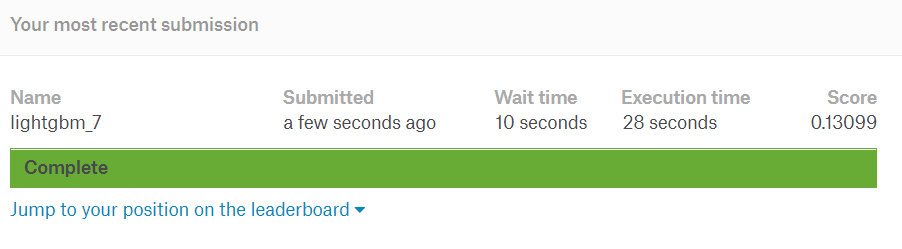

In [271]:
pil.open('score.png')

# 736480 = 2017.5.31

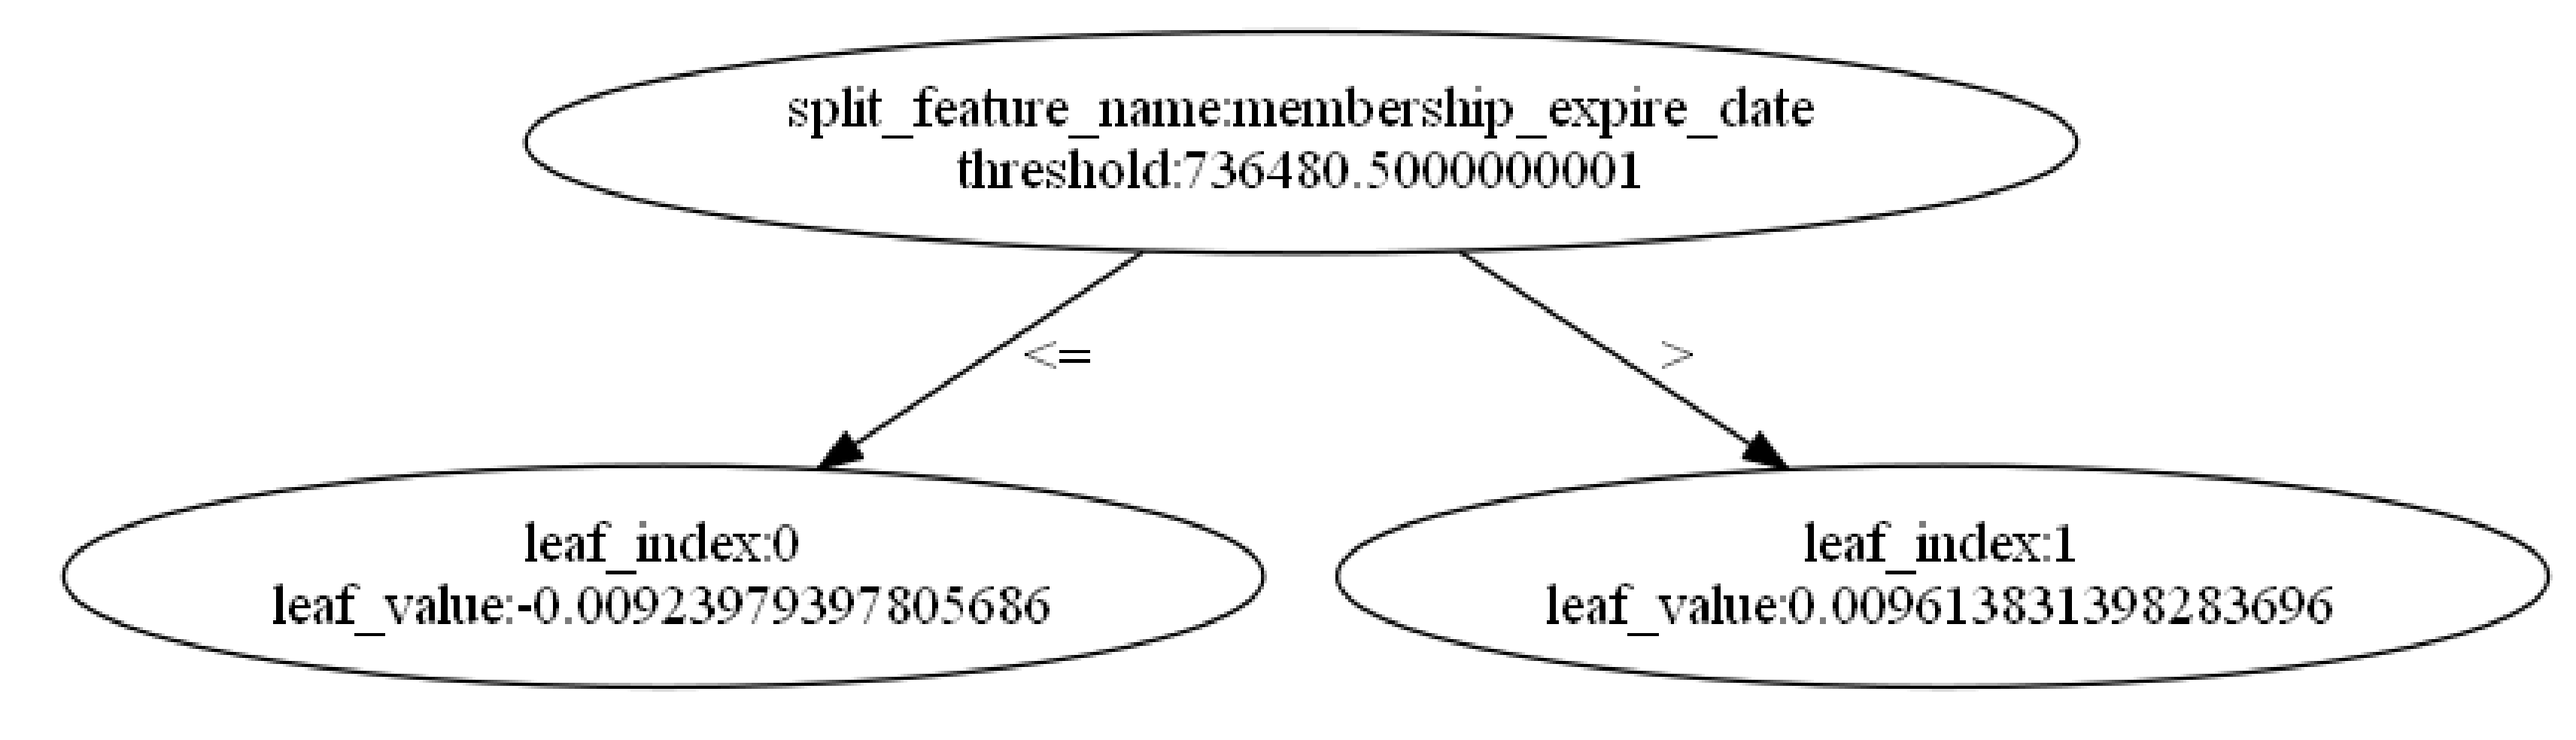

In [272]:
pil.open('tree.png')

> Score : 115 / 575

In [276]:
def calculate_entropy(data, column, column_data):
    
    churn = len(data[data[column] == column_data][data["is_churn"] == 1])
    no_churn = len(data[data[column] == column_data][data["is_churn"] == 0])
    people = len(data[data[column] ==  column_data])
    
    if no_churn == 0:
        entropy = - (churn/people)*np.log((churn/people))
    elif churn == 0:
        entropy = - (no_churn/people)*np.log((no_churn/people))
    else:
        entropy = - (churn/people)*np.log((churn/people)) - (no_churn/people)*np.log((no_churn/people))
    return entropy


def calculate_entropy_sum(df, column):

    a = 0
    for data in np.unique(df[column]):
        b = calculate_entropy(df, column, data)
        a += len(df[df[column] ==  data])/len(df[column]) * b
    return a


In [274]:
columns = ['payment_method_id', 'payment_plan_days',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'total_secs', 'city',
       'gender', 'registered_via', 'registration_init_time', 'age', 'counts']

In [ ]:
for i in columns:
    print(i, calculate_entropy_sum(tr, i))

C:\Users\jeongin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jeongin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


payment_method_id 0.1837529408356729
payment_plan_days 0.1788493759694795
actual_amount_paid 0.17238943591199707
is_auto_renew 0.20261541060886262
transaction_date 0.2051147287755534
membership_expire_date 0.10407873438838189
is_cancel 0.18830357704718612
